In [69]:
import numpy as np
import pandas as pd

<h3 style={color:black}>Importing the dataset<h3>

In [2]:
df=pd.read_csv("/Volumes/YE/projects/datasets/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<h3 style={color:black}>Checking for null values<h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<h3 style={color:black}>Calculating Descriptive Statistics<h3>

In [4]:
df.describe() #gives the central tendancy and variance regarding each column

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<h3 style={color:black}>Calculating Correlation matrix<h3>

In [5]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
z=df[['R&D Spend','Administration','Marketing Spend']]
vif_data=pd.DataFrame()
vif_data["Features"]=z.columns
vif_data["VIF"]=[variance_inflation_factor(z.values,i)
                for i in range(len(z.columns))]
print(vif_data)

          Features       VIF
0        R&D Spend  8.384571
1   Administration  4.026406
2  Marketing Spend  7.593984


The correlation matrix does not show any values above 0.8 for independent variables.<br>
The VIF(Variance Inflation Factor) does not show any values above 10.<br>
Therefore, No high correlation values found.<br>
multicollinearity present due to moderate collinearity between Marketing Spend and R&D Spend<br>
conclusion: 
R&D Spend directly effects the Profit
Marketing Spend Directly effects the Profit.
Administration does not effect the Profit greatly.

In [6]:
import matplotlib.pyplot as plt

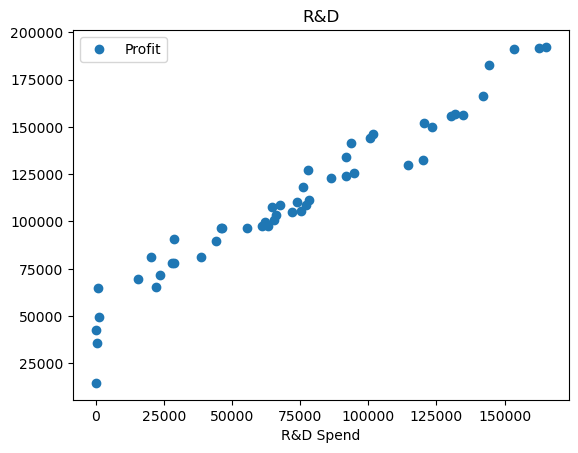

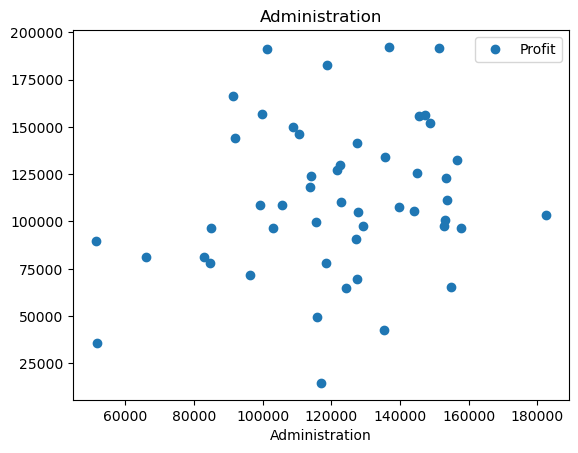

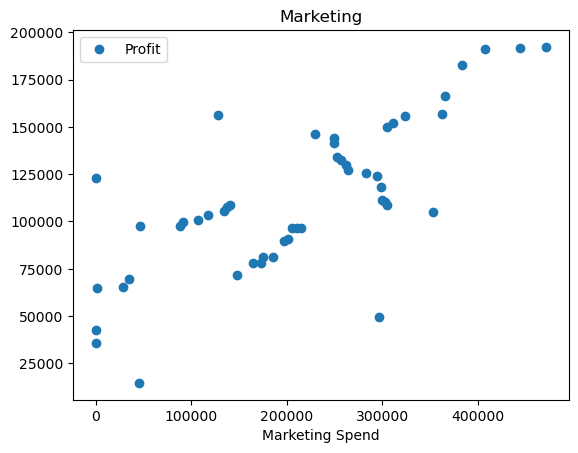

In [7]:
df.plot(x="R&D Spend",y="Profit",style="o").set_title("R&D")
df.plot(x="Administration",y="Profit",style="o").set_title("Administration")
df.plot(x="Marketing Spend",y="Profit",style="o").set_title("Marketing")
plt.show()


R&D Spend and Profit has a linear relationship.<br>
Administration and Profit has no directly visible linear relationship.<br>
Marketing Spend and Profit has a linear relationship.

<h3>Testing for Normality<h3>

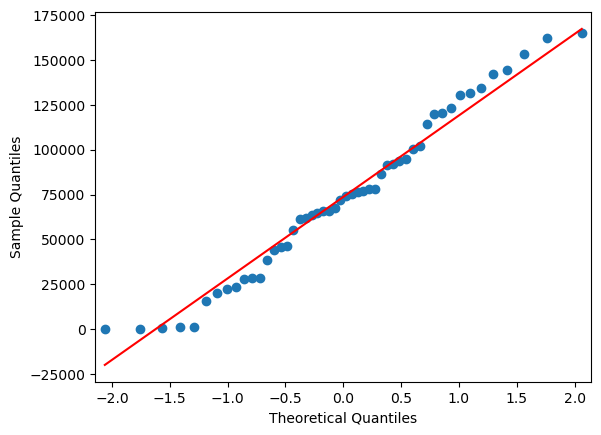

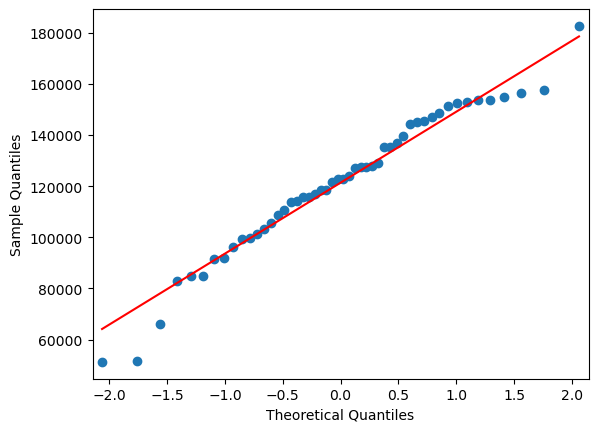

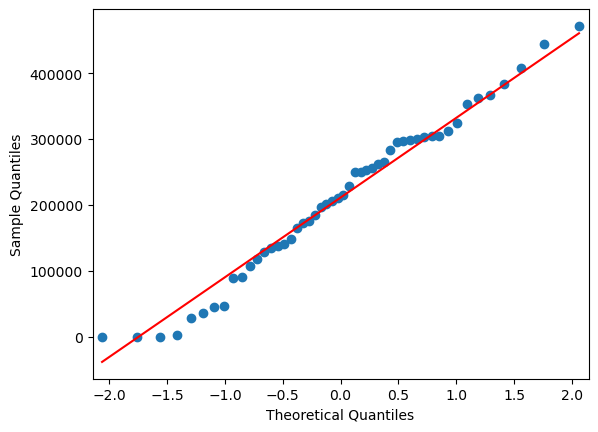

In [120]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['R&D Spend'],line='s')
qqplot(df['Administration'],line='s')
qqplot(df['Marketing Spend'],line='s')
plt.show()

The dataset follows a normal distribution

<h3>Splitting Dependent and Independent Variables<h3>

In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

<h3>Converting categorical variables into Dummy Variables<h3>

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

<h3>Solving the Dummy Variable Trap problem<h3>

In [13]:
x=np.delete(x,2,axis=1)
x

array([[0.0, 0.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 94657.16, 145077.58, 282574.31],
       [0.0, 1.0, 91749.16, 114175.79, 294919.57],
       [0.0, 0.0, 86419.7

<h3>Splitting the dataset into train and test data<h3>

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [111]:
x_test

array([[0.0, 0.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 46014.02, 85047.44, 205517.64],
       [1.0, 0.0, 28754.33, 118546.05, 172795.67],
       [0.0, 0.0, 20229.59, 65947.93, 185265.1],
       [0.0, 1.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 144372.41, 118671.85, 383199.62],
       [0.0, 0.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 65605.48, 153032.06, 107138.38],
       [0.0, 1.0, 1315.46, 115816.21, 297114.46],
       [0.0, 0.0, 61136.38, 152701.92, 88218.23]], dtype=object)

<h3>Testing a Linear Regression Model on data<h3>

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=regressor.predict(x_test)

In [26]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]


In [27]:
resid=y_test-y_pred
resid

array([ -9656.11,   5886.35,   2547.07,  11007.17,  11260.13,  11325.07,
       -14080.18,  -1272.02,  -9158.63,   -788.47])

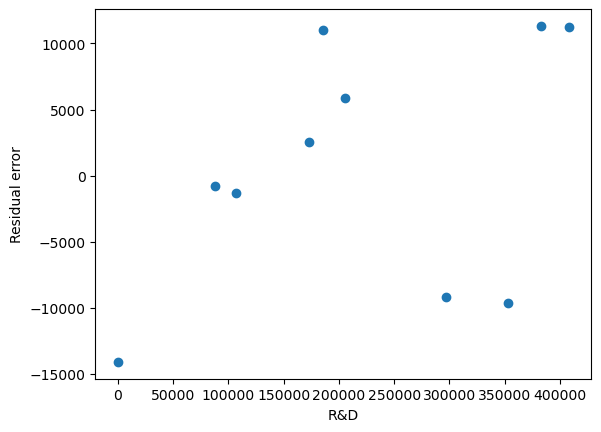

In [39]:
plt.scatter(x_test[:,4],resid)
plt.xlabel("R&D")
plt.ylabel("Residual error")
plt.show()

<h3>Testing for Homoscedacticity<h3>

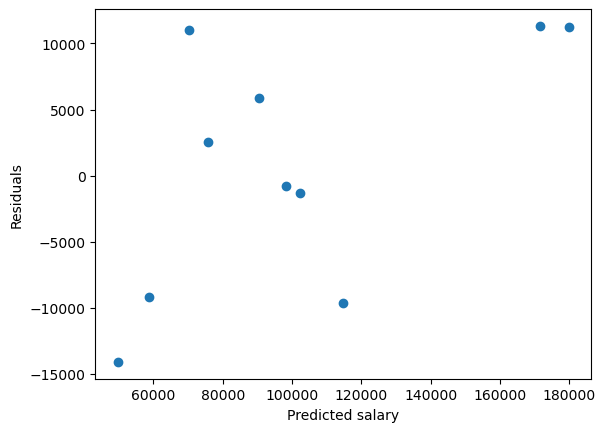

In [40]:
plt.scatter(y_pred,resid)
plt.xlabel("Predicted salary")
plt.ylabel("Residuals")
plt.show()

Heteroscedasticity found due to cone shape present in graph

<h3>Testing for linearity<h3>

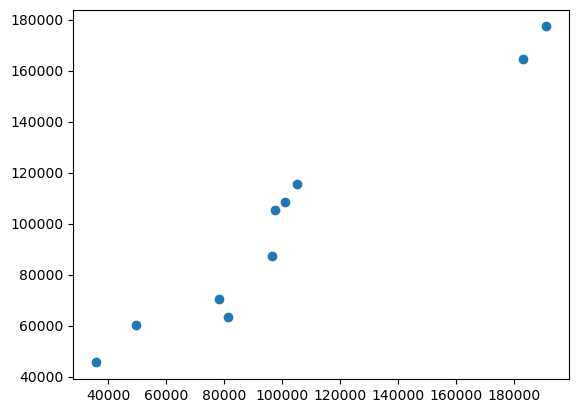

In [101]:
plt.scatter(y_test,y_pred)
plt.show()

Linearity observed.

<h3>Using r-squared to evaluate the model<h3>

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9649618042060475

The model performs well although there is Multicolinearity and Heteroscedasticity present, due to the strong linear relationship between R&D Spend, Marketing Spend and Profit.